In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# №1

In [87]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df = df[['Age', 'Max_BPM', 'Resting_BPM', 'BMI']]
df.head()

,Age,Max_BPM,Resting_BPM,BMI
0,56,180,60,30.20
1,46,179,66,32.00
2,32,167,54,24.71
3,25,190,56,18.41
4,38,188,68,14.39


In [88]:
df.isna().sum()

Age            0
Max_BPM        0
Resting_BPM    0
BMI            0
dtype: int64

# №2

In [89]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['Age', 'Max_BPM', 'Resting_BPM', 'BMI'])

In [90]:
df

,Age,Max_BPM,Resting_BPM,BMI
0,1.422343,0.010081,-0.303555,0.794278
1,0.600965,-0.076726,0.515749,1.064652
2,-0.548964,-1.118414,-1.122858,-0.030361
3,-1.123928,0.878155,-0.849757,-0.976669
4,-0.056137,0.704540,0.788850,-1.580503
...,...,...,...,...
968,-1.206066,0.617733,0.652299,0.579482
969,-1.123928,0.357311,-0.849757,0.116842
970,1.668756,1.225384,-1.259409,-0.812942
971,-0.548964,1.572614,-0.030454,1.926843


In [91]:
models = []
score1 = []
score2 = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init = 'k-means++').fit(df)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(df, model.labels_))

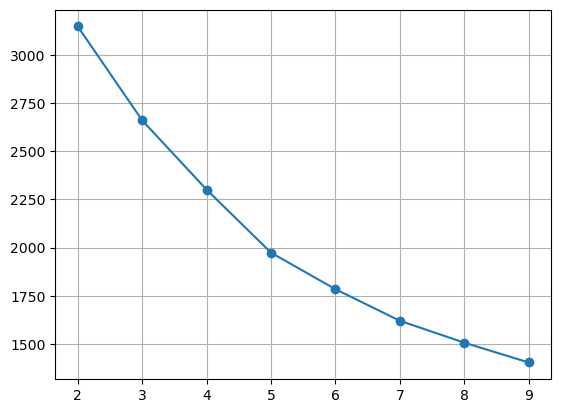

In [92]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker = 'o')
plt.show()

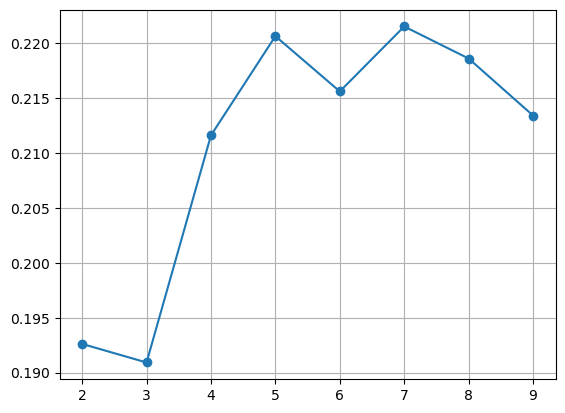

In [93]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = 'o')
plt.show()

Коэффициента силуэта достигает максимума при k = 7. Результат кластеризации данных для 7 кластеров:

In [94]:
model1 = KMeans(n_clusters=7, random_state=123, init = 'k-means++').fit(df)
model1.cluster_centers_

array([[ 0.66448472, -1.02929192,  0.63864411, -0.42181191],
       [ 0.68408045,  0.94377717,  0.77340653, -0.23846109],
       [ 0.09040393,  0.30996137,  0.10609685,  2.05327347],
       [-0.77841979,  0.8882358 , -0.84535234, -0.16105131],
       [-0.75329015, -1.05312927, -0.82492982, -0.04719424],
       [ 0.99749202, -0.18209209, -1.030569  , -0.20524407],
       [-1.06429408, -0.10467075,  0.99461089, -0.11589705]])

In [95]:
labels = model1.labels_

In [96]:
df['Cluster'] = labels

Количество объектов в каждом кластере:

In [97]:
df['Cluster'].value_counts()

1    168
3    155
0    150
6    146
5    145
4    121
2     88
Name: Cluster, dtype: int64

In [98]:
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

# №3
Иерархическая агломеративная кластеризация

In [99]:
model2 = AgglomerativeClustering(7, compute_distances=True)
clastering = model2.fit(df)
df['Cluster'] = clastering.labels_

In [100]:
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

# №4
DBSCAN (Density-based spatial clustering of applications with noise)

In [101]:
df

,Age,Max_BPM,Resting_BPM,BMI,Cluster
0,1.422343,0.010081,-0.303555,0.794278,2
1,0.600965,-0.076726,0.515749,1.064652,0
2,-0.548964,-1.118414,-1.122858,-0.030361,6
3,-1.123928,0.878155,-0.849757,-0.976669,4
4,-0.056137,0.704540,0.788850,-1.580503,5
...,...,...,...,...,...
968,-1.206066,0.617733,0.652299,0.579482,3
969,-1.123928,0.357311,-0.849757,0.116842,4
970,1.668756,1.225384,-1.259409,-0.812942,2
971,-0.548964,1.572614,-0.030454,1.926843,0


In [102]:
model3 = DBSCAN(eps=0.7, min_samples=10).fit(df)

In [103]:
df['Cluster'] = np.array(model3.labels_)
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [104]:
model4 = DBSCAN(eps=0.5, min_samples=8).fit(df)
df['Cluster'] = np.array(model4.labels_)

In [105]:
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [107]:
model5 = DBSCAN(eps=0.7, min_samples=20).fit(df)
df['Cluster'] = np.array(model5.labels_)
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

# Выводы:
При радиусе = 0,7 и порогу N по количеству точек в окрестности 10 DBSCAN выделил 9 кластеров.
При радиусе = 0,5 и порогу N по количеству точек в окрестности 8 DBSCAN выделил 7 кластеров.
При радиусе = 0,7 и порогу N по количеству точек в окрестности 20 DBSCAN выделил 2 кластера.
DBSCAN это один из самых эффективных алгоритмов кластеризации, но работает он достаточно долго.